 ## Vacunas y Sentimientos 
 ### Denis Lopez
 ### Wendy Hernandez 
 ### Jessica Roncancio 

😀😀😂🤣😃😄😅😆😉😊😋😎😍😘🥰😗😙😚😐😑😶🙄😏😣😥😮😛😜😝🤤😒🙁😲☹😖😞😟😤😧😦😭😢😨😩🤯😬😱😡😷🤒🤕🤢
          

## Objetivo 

https://www.youtube.com/watch?v=b7ard1O6DuU

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

## Se realiza Análisis de la Vacuna Pfizer

In [ ]:
##PROYECTAR
# Instalamos las librerias
import pandas as pd
import numpy as np
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import re
import regex
import emoji
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Extraccion y procesamiento de los tweets

In [ ]:
##PROYECTAR
keys = pd.read_csv("mis_llaves.csv", header=None)
keys = dict(zip(keys[0],keys[1])) #Convetir a diccionario 
keys.keys()


dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [ ]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweets = tweepy.Cursor(api.search,
                       q=['Pfizer -RT'], 
                       lang='es', 
                       geocode='4.595718,-73.645620,220km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(10000)



In [ ]:
tweets ## convertir en objecto  interador a  normal es decir lista

In [ ]:
# Objecto generador
t = [tweet for tweet in tweets]

In [ ]:
#PROYECTAR
t[0].full_text

'Colombia recibió este miércoles 538.200 vacunas de la farmacéutica Pfizer, cifra con la cual el país llega a 14’778.244 dosis, para continuar con el Plan Nacional de Vacunación contra el covid-19, que busca inmunizar a 35,2 millones de personas. https://t.co/m0r8v0Wg9M'

In [ ]:
#PROYECTAR
#Comprobamos la Ubicacion
t[0].user.location

'Bogotá, Colombia'

In [ ]:
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)

In [ ]:
##proyectar
## mostralo bonito    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweets,date,city,user_location,id,link
0,Colombia recibió este miércoles 538.200 vacuna...,2021-06-03 00:40:35,Bogotá,"Bogotá, Colombia",1400251028205932547,https://twitter.com/i/web/stuatus/140025102820...
1,@ElGarzonS @RonnySuarez_ En mi lógica las segu...,2021-06-03 00:40:16,Bogotá,Bogota,1400250948233089026,https://twitter.com/i/web/stuatus/140025094823...
2,@mariosegura @aris_dude @anduboi @oscarulloa01...,2021-06-03 00:27:52,Bogotá,CostaRica,1400247830166577162,https://twitter.com/i/web/stuatus/140024783016...
3,@harmanfelipe @villavoalcaldia @esevillavo @sa...,2021-06-03 00:27:20,Bogotá,"Villavicencio, Colombia",1400247694795345920,https://twitter.com/i/web/stuatus/140024769479...
4,@luvasquezv @jdclarke Los representantes de Pf...,2021-06-03 00:21:51,Bogotá,CostaRica,1400246314529611779,https://twitter.com/i/web/stuatus/140024631452...


In [ ]:
##Limpieza de datos


import re 

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [ ]:
def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions
  

In [ ]:
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions
0,Colombia recibió este miércoles 538.200 vacuna...,2021-06-03 00:40:35,Bogotá,"Bogotá, Colombia",1400251028205932547,https://twitter.com/i/web/stuatus/140025102820...,Colombia recibió este miércoles 538.200 vacuna...,[https://t.co/m0r8v0Wg9M],[],[]
1,@ElGarzonS @RonnySuarez_ En mi lógica las segu...,2021-06-03 00:40:16,Bogotá,Bogota,1400250948233089026,https://twitter.com/i/web/stuatus/140025094823...,En mi lógica las segundas dosis corresponden...,[],[],"[@ElGarzonS, @RonnySuarez_]"
2,@mariosegura @aris_dude @anduboi @oscarulloa01...,2021-06-03 00:27:52,Bogotá,CostaRica,1400247830166577162,https://twitter.com/i/web/stuatus/140024783016...,Los representantes de pfizer no son ticos ...,[],[],"[@mariosegura, @aris_dude, @anduboi, @oscarull..."
3,@harmanfelipe @villavoalcaldia @esevillavo @sa...,2021-06-03 00:27:20,Bogotá,"Villavicencio, Colombia",1400247694795345920,https://twitter.com/i/web/stuatus/140024769479...,Hoy junto con mi papá fuimos vacunado...,[],[],"[@harmanfelipe, @villavoalcaldia, @esevillavo,..."
4,@luvasquezv @jdclarke Los representantes de Pf...,2021-06-03 00:21:51,Bogotá,CostaRica,1400246314529611779,https://twitter.com/i/web/stuatus/140024631452...,"Los representantes de Pfizer no viven aqui, ...",[],[],"[@luvasquezv, @jdclarke]"
...,...,...,...,...,...,...,...,...,...,...
890,"Más evidencia desde países bajos, infectados q...",2021-05-26 07:27:09,Bogotá,"Medellín, Colombia",1397454240684158978,https://twitter.com/i/web/stuatus/139745424068...,"Más evidencia desde países bajos, infectados q...","[https://t.co/FVx23ZrJhK, https://t.co/GWnH8Nl...",[#SARS_CoV_2],[]
891,A mi mamá ya le aplicaron las dos dosis de Pfi...,2021-05-26 06:48:45,Bogotá,"Cali, Colombia",1397444580560318468,https://twitter.com/i/web/stuatus/139744458056...,A mi mamá ya le aplicaron las dos dosis de Pfi...,[],[],[]
892,@adrescala @yoyotroyo Lo dijo el ministro en u...,2021-05-26 04:07:01,Bogotá,Colombia,1397403876031188994,https://twitter.com/i/web/stuatus/139740387603...,"Lo dijo el ministro en un video, la salud me...",[],[],"[@adrescala, @yoyotroyo]"
893,@jaimevalle24 @MinSaludCol @CoomevaSaludEPS Ho...,2021-05-26 03:25:01,Bogotá,Colombia,1397393306103992323,https://twitter.com/i/web/stuatus/139739330610...,"Holaaa! A mi papá, de 67 años, le pasó algo...",[],[],"[@jaimevalle24, @MinSaludCol, @CoomevaSaludEPS]"


In [ ]:
#PROYECTAR
#limpieza del texto
import re 

# stopwords.append("https")
# stopwords.append("co")

stopwords.extend(["Covid", "covid", "Pfizer", "Vacuna", "sinovac", "vacunas", "colombia", "vacuna", "pfizer"])#quitar palabras muy repetidas

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.texto_limpio.apply(lambda texto: pre_procesado(texto))

data.head()

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions,pp
0,Colombia recibió este miércoles 538.200 vacuna...,2021-06-03 00:40:35,Bogotá,"Bogotá, Colombia",1400251028205932547,https://twitter.com/i/web/stuatus/140025102820...,Colombia recibió este miércoles 538.200 vacuna...,[https://t.co/m0r8v0Wg9M],[],[],recibió miércoles farmacéutica cifra país lleg...
1,@ElGarzonS @RonnySuarez_ En mi lógica las segu...,2021-06-03 00:40:16,Bogotá,Bogota,1400250948233089026,https://twitter.com/i/web/stuatus/140025094823...,En mi lógica las segundas dosis corresponden...,[],[],"[@ElGarzonS, @RonnySuarez_]",lógica segundas dosis corresponden próxima sem...
2,@mariosegura @aris_dude @anduboi @oscarulloa01...,2021-06-03 00:27:52,Bogotá,CostaRica,1400247830166577162,https://twitter.com/i/web/stuatus/140024783016...,Los representantes de pfizer no son ticos ...,[],[],"[@mariosegura, @aris_dude, @anduboi, @oscarull...",representantes ticos responden legislación dip...
3,@harmanfelipe @villavoalcaldia @esevillavo @sa...,2021-06-03 00:27:20,Bogotá,"Villavicencio, Colombia",1400247694795345920,https://twitter.com/i/web/stuatus/140024769479...,Hoy junto con mi papá fuimos vacunado...,[],[],"[@harmanfelipe, @villavoalcaldia, @esevillavo,...",hoy junto papá vacunados colegio industrial ci...
4,@luvasquezv @jdclarke Los representantes de Pf...,2021-06-03 00:21:51,Bogotá,CostaRica,1400246314529611779,https://twitter.com/i/web/stuatus/140024631452...,"Los representantes de Pfizer no viven aqui, ...",[],[],"[@luvasquezv, @jdclarke]",representantes viven aqui ticos rigen legislac...


In [ ]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

In [ ]:
data['emojis'] = data['texto_limpio'].apply(lambda text: get_emojis(text))
data.head()

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions,pp,emojis
0,Colombia recibió este miércoles 538.200 vacuna...,2021-06-03 00:40:35,Bogotá,"Bogotá, Colombia",1400251028205932547,https://twitter.com/i/web/stuatus/140025102820...,Colombia recibió este miércoles 538.200 vacuna...,[https://t.co/m0r8v0Wg9M],[],[],recibió miércoles farmacéutica cifra país lleg...,[]
1,@ElGarzonS @RonnySuarez_ En mi lógica las segu...,2021-06-03 00:40:16,Bogotá,Bogota,1400250948233089026,https://twitter.com/i/web/stuatus/140025094823...,En mi lógica las segundas dosis corresponden...,[],[],"[@ElGarzonS, @RonnySuarez_]",lógica segundas dosis corresponden próxima sem...,"[💉, 💉, 💉]"
2,@mariosegura @aris_dude @anduboi @oscarulloa01...,2021-06-03 00:27:52,Bogotá,CostaRica,1400247830166577162,https://twitter.com/i/web/stuatus/140024783016...,Los representantes de pfizer no son ticos ...,[],[],"[@mariosegura, @aris_dude, @anduboi, @oscarull...",representantes ticos responden legislación dip...,[]
3,@harmanfelipe @villavoalcaldia @esevillavo @sa...,2021-06-03 00:27:20,Bogotá,"Villavicencio, Colombia",1400247694795345920,https://twitter.com/i/web/stuatus/140024769479...,Hoy junto con mi papá fuimos vacunado...,[],[],"[@harmanfelipe, @villavoalcaldia, @esevillavo,...",hoy junto papá vacunados colegio industrial ci...,[]
4,@luvasquezv @jdclarke Los representantes de Pf...,2021-06-03 00:21:51,Bogotá,CostaRica,1400246314529611779,https://twitter.com/i/web/stuatus/140024631452...,"Los representantes de Pfizer no viven aqui, ...",[],[],"[@luvasquezv, @jdclarke]",representantes viven aqui ticos rigen legislac...,[]


### Análisis de Sentimiento


In [ ]:
datae = data[['tweets', 'emojis']]
datae.head()

,tweets,emojis
0,Colombia recibió este miércoles 538.200 vacuna...,[]
1,@ElGarzonS @RonnySuarez_ En mi lógica las segu...,"[💉, 💉, 💉]"
2,@mariosegura @aris_dude @anduboi @oscarulloa01...,[]
3,@harmanfelipe @villavoalcaldia @esevillavo @sa...,[]
4,@luvasquezv @jdclarke Los representantes de Pf...,[]


In [ ]:

#SE ASIGNA PUNTAJE A LOS EMOJIS Y TEXTO

data['puntaje_sent']=data['texto_limpio'].apply(lambda x: vader.polarity_scores(x)['compound'])
data[['texto_limpio','puntaje_sent', 'emojis']]

,texto_limpio,puntaje_sent,emojis
0,Colombia recibió este miércoles 538.200 vacuna...,0.0000,[]
1,En mi lógica las segundas dosis corresponden...,0.0000,"[💉, 💉, 💉]"
2,Los representantes de pfizer no son ticos ...,-0.6808,[]
3,Hoy junto con mi papá fuimos vacunado...,-0.6679,[]
4,"Los representantes de Pfizer no viven aqui, ...",-0.6808,[]
...,...,...,...
890,"Más evidencia desde países bajos, infectados q...",0.0000,[]
891,A mi mamá ya le aplicaron las dos dosis de Pfi...,0.0000,[]
892,"Lo dijo el ministro en un video, la salud me...",0.0000,[]
893,"Holaaa! A mi papá, de 67 años, le pasó algo...",0.5093,[]


In [ ]:
data['puntaje']=data['texto_limpio'].apply(lambda x: vader.polarity_scores(x)['compound'])
data[['texto_limpio','puntaje']]


,texto_limpio,puntaje
0,Colombia recibió este miércoles 538.200 vacuna...,0.0000
1,En mi lógica las segundas dosis corresponden...,0.0000
2,Los representantes de pfizer no son ticos ...,-0.6808
3,Hoy junto con mi papá fuimos vacunado...,-0.6679
4,"Los representantes de Pfizer no viven aqui, ...",-0.6808
...,...,...
890,"Más evidencia desde países bajos, infectados q...",0.0000
891,A mi mamá ya le aplicaron las dos dosis de Pfi...,0.0000
892,"Lo dijo el ministro en un video, la salud me...",0.0000
893,"Holaaa! A mi papá, de 67 años, le pasó algo...",0.5093


## Tweet  (PFIZER)

In [ ]:
def pre_procesado(texto):
    if texto > 0:
        senti = 'POSITIVE'
        #return senti
    if texto < 0:
        senti = 'NEGATIVE' 
        #return senti
    if texto == 0:
        senti = 'NEUTRO' 
    return senti

data['tipo_sent'] = data['puntaje_sent'].apply(lambda texto: pre_procesado(texto))
#data



## Cantidad de Tweets segun el tipo de Sentimiento (PFIZER)


In [ ]:

Cant_Tipo = pd.DataFrame(data.tipo_sent.value_counts()).reset_index()
Cant_Tipo.columns = ['tipo_sent', 'cnt']
Cant_Tipo = Cant_Tipo.sort_values('cnt')
Cant_Tipo

,tipo_sent,cnt
2,POSITIVE,77
1,NEGATIVE,213
0,NEUTRO,605


## Ejemplo de Tweet

In [ ]:
data[['texto_limpio','puntaje']].max()

texto_limpio    🦠 CRISIS DEL  \n\nLa Junta defiende la «libert...
puntaje                                                    0.9837
dtype: object

In [ ]:
data[['texto_limpio','puntaje']].min()

texto_limpio    \n\n1️⃣Tres hoteles están entre los mejores: \...
puntaje                                                   -0.9796
dtype: object

## Tweet más negativo  (PFIZER)


In [ ]:

data[['texto_limpio','puntaje_sent','emojis']].sort_values('puntaje_sent',ascending=True)

,texto_limpio,puntaje_sent,emojis
470,hoy mi mamá recibe la primera dosis de Pfizer ...,-0.9796,"[😭, 😭, 😭, 😭, 😭, 😭, 😭, 😭, 😭]"
713,mi madre ya tiene la primera dosis de Pfizer e...,-0.9753,"[🙌🏼, 😩, 😭, 🙌🏼, ❤️, 🙌🏼, 😩, 😭, ❤️, 🙌🏼, 😩, 😭, ❤️,..."
310,Le entiendo. La semana pasada una conocida m...,-0.8957,"[😭, 😭]"
740,😭😭😭 no me gano mi vacuna de Pfizer en bebés ...,-0.8885,"[😭, 😭, 😭]"
141,No hay ni para el personal de salud ? No hay ...,-0.8738,[]
...,...,...,...
153,"Lo cierto es que la mancada es tenaz, con la ...",0.8910,"[😂, 😂, 😂, 😂]"
733,"-hola mami, mucho gusto, que haces?\n-bebe, ho...",0.9615,"[🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🙈, 🤦‍♂️]"
770,"Yo picho todavía, gracias Pfizer 🤣🤣🤣🤣🤣🤣🤣",0.9698,"[🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣]"
87,Primera dosis de Pfizer para mi mamá. \n🎉🎉🎉🎉🎉🎉...,0.9829,"[🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉]"


## El Tweet más negativo es el numero 470 :


In [ ]:

t[470].full_text

'hoy mi mamá recibe la primera dosis de Pfizer 😭😭😭😭😭😭😭😭😭'

## Tweet más positivos   (PFIZER)


In [ ]:

data[['texto_limpio','puntaje_sent','emojis']].sort_values('puntaje_sent',ascending=False)

,texto_limpio,puntaje_sent,emojis
228,"Ya vacunaron a mi mamá con la pfizer, estoy de...",0.9837,"[🥰, 🥰, 🥰, 🥰]"
87,Primera dosis de Pfizer para mi mamá. \n🎉🎉🎉🎉🎉🎉...,0.9829,"[🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉, 🎉]"
770,"Yo picho todavía, gracias Pfizer 🤣🤣🤣🤣🤣🤣🤣",0.9698,"[🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣]"
733,"-hola mami, mucho gusto, que haces?\n-bebe, ho...",0.9615,"[🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🙈, 🤦‍♂️]"
153,"Lo cierto es que la mancada es tenaz, con la ...",0.8910,"[😂, 😂, 😂, 😂]"
...,...,...,...
141,No hay ni para el personal de salud ? No hay ...,-0.8738,[]
740,😭😭😭 no me gano mi vacuna de Pfizer en bebés ...,-0.8885,"[😭, 😭, 😭]"
310,Le entiendo. La semana pasada una conocida m...,-0.8957,"[😭, 😭]"
713,mi madre ya tiene la primera dosis de Pfizer e...,-0.9753,"[🙌🏼, 😩, 😭, 🙌🏼, ❤️, 🙌🏼, 😩, 😭, ❤️, 🙌🏼, 😩, 😭, ❤️,..."


## El tweet más positivo es el numero 228 :


In [ ]:
t[228].full_text


'Ya vacunaron a mi mamá con la pfizer, estoy demasiado feliz 🥰🥰🥰🥰.'

## Visualizaciones 😊



In [ ]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

## Emojis mas usados


In [ ]:

from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
0,💉,44
45,😭,23
28,🤣,22
14,🎉,12
35,👇🏼,11


In [ ]:
!pip install plotly

In [ ]:
#proyectar 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig1 = go.Figure(data=[trace], layout=layout)
#iplot(fig1)

In [ ]:
# Importamos las librerias
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords

stopwords = stopwords.words('spanish')

## NUBE DE PALABRAS



In [ ]:
Nube_Colombia1= PIL.Image.open("colombia3.png")


In [ ]:
mask = np.array(Nube_Colombia1)

In [ ]:
P = data.loc[:, 'puntaje_sent'] > 0
df_p = data.loc[P]

In [ ]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='inferno',
                      stopwords=stopwords,
                      mask=mask, contour_width=4, contour_color='black').generate(palabras) 



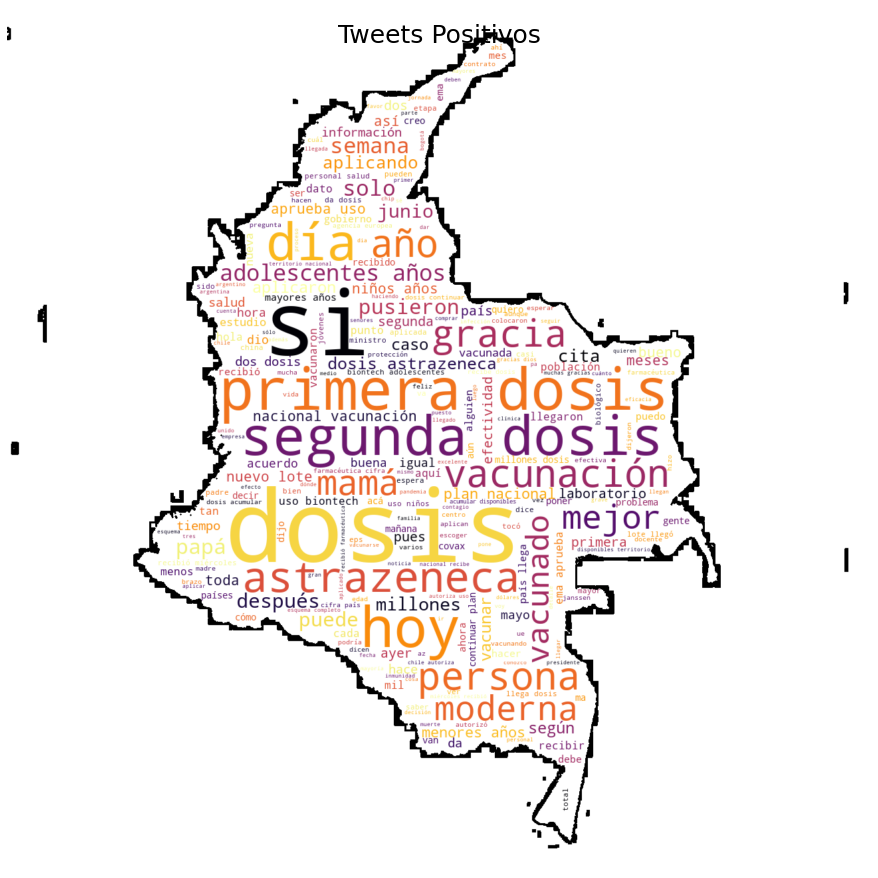

In [ ]:

wordcloud.to_file("colombia3.png")
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.suptitle('Tweets Positivos',fontsize=25
)
plt.show()


In [ ]:
Nube_Colombia2= PIL.Image.open("colombia3.png")

In [ ]:
mask_1 = np.array(Nube_Colombia2)

In [ ]:
P2 = data.loc[:, 'puntaje_sent'] < 0
df_p2 = data.loc[P2]

In [ ]:
palabras2 = data.pp.str.cat(sep=" ")
wordcloud2 = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='inferno',
                      stopwords=stopwords,
                      mask=mask, contour_width=4, contour_color='black').generate(palabras) 


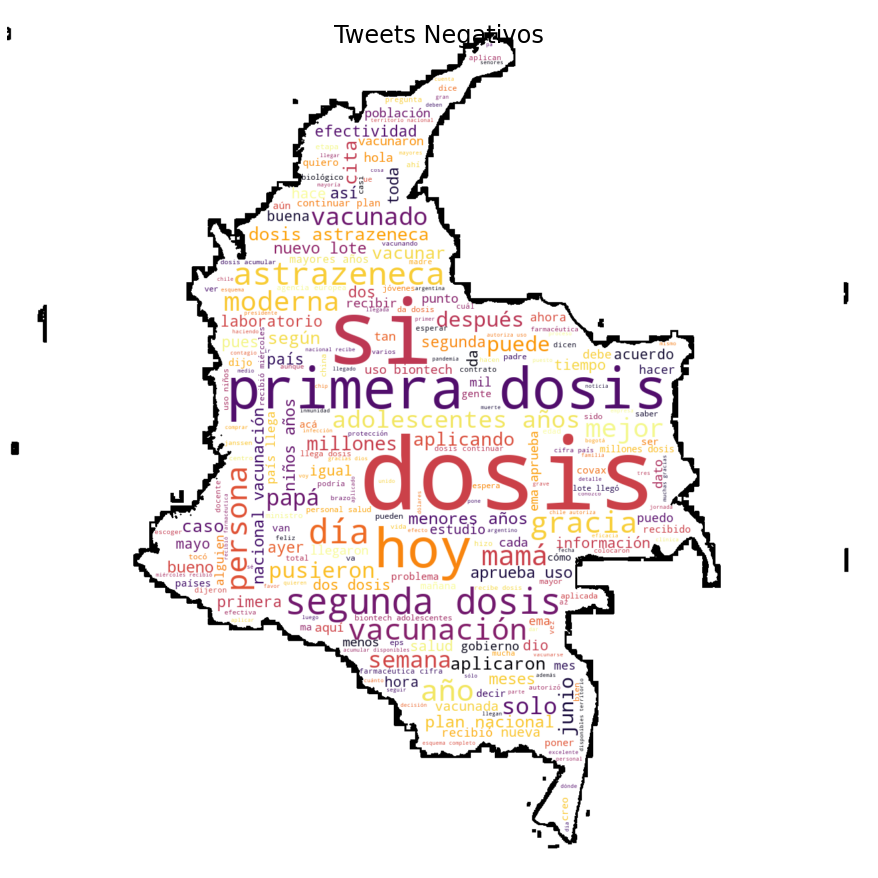

In [ ]:

wordcloud.to_file("colombia3.png")
plt.figure(figsize=(12,12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.suptitle('Tweets Negativos',fontsize=24) 
plt.show()

## Conclusiones Finales

## Tipo de Sentimiento

- De los Tweets extraidos en las vacunas (Pfizer y Sinovac)  se evidencia que mas de la mitad de tweets son neutros , 64% para Sinovac y 68% Pfizer 
- En cuanto a los Tweets positivos se evidencia que en las vacunas (Pfizer y Sinovac)  fue del 9% del total de los tweets 
- Para los tweets Negativos Sinovac estuvo mas alto de Pfizer por un 3% adicional de tweets negativos sobre la cantidad total 




## Tipo de Emoji

- En cuanto a los emojis se evidencia que el emoji mas usado en las vacunas (Pfizer y Sinovac) es la jeringa💉
- Se evidencia que en los comentarios de la vacuna Pfizer se utilizaron mas emojis de caritas que en Sinovac , esto con 23 caritas llorando 😭 y 22 Riendo 🤣
- Se evidencia que los comentarios de Sinovac contenian emoji de ❤️ mientras Pfizer no



## Nube de Palabras

*   En las nubes de Palabras de los Tweets positivos de  se evidencia que la mayoria de comentarios se refieren a que ya los estan vacunando y algunos que van a recibir su segunda dósis 
*   Se evidencia que en la nube de palabras de SINOVAC la palabra en los tweets positivos "Efectividad"es más notoria que en la nube de PFIZER
*   Se evidencia que las frases "Primera dósis" y "Segunda dósis" estan a la par en tamaño en las vacunas , lo que nos podria indicar que varias personas ya recibieron su primera y segunda dosis . 
*   Sin embargo en los tweets negativos es más notoria la frase "Primera dósis "en Pfizer que en Sinovac , lo que nos podria indicar que en Pzfizer se presentaron más inconvenientes en la aplicación de la primera dósis 
*   Se evidencian palabras que resaltan como papá y mamá lo que denota que la gente estaba pendiente de sus familiares






## Conclusiones finales 


*   Se concluye de lo anterior que los twwets no nos mostraron un sentimiento en concreto frente a la vacuna , si no que la gente estaba mas pendiente de los tiempos de vacunacion , efectividad , aplicacion de primera y segunda dosis , principalmente de sus familiares , sin embargo la vacuna de Sinovac tuvo levemente mas tweets negativos que Pfizer.


